In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
dataset = pd.read_csv("polynomial_salary.csv")
dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [116]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


Observation:

The correlation coefficient is very high (close to 1), which indicates a strong positive linear relationship. This means the dataset is suitable for regression, but the pattern may still be nonlinear (e.g., polynomial), as the Salary grows faster with higher Levels.

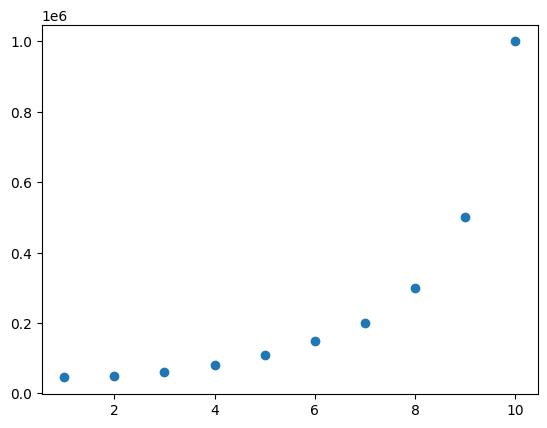

In [117]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.show()

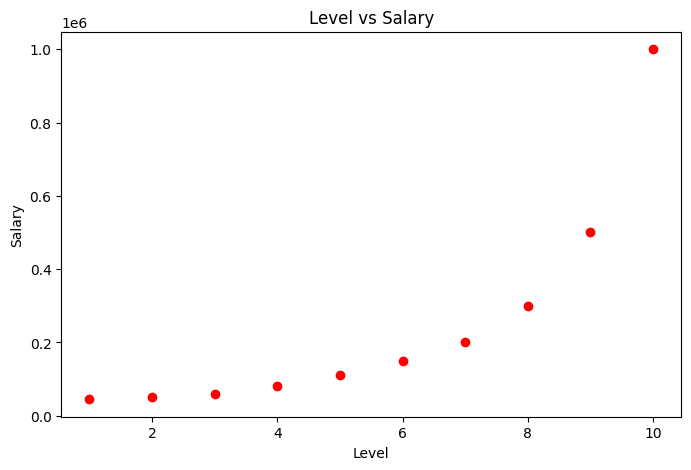

In [118]:
plt.figure(figsize=(8,5))
plt.scatter(dataset["Level"], dataset["Salary"], color='red')
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()


The scatter plot between Level and Salary shows a curved, non-linear upward trend. Since the relationship is not linear and the rate of salary increase grows with higher levels, polynomial regression is more suitable than linear regression.

In [119]:
x = dataset[["Level"]]
y = dataset["Salary"]


In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [121]:
pf = PolynomialFeatures(degree=7)
pf.fit(x)
pf.transform(x)


array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01, 6.400000e+01, 1.280000e+02],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02, 7.290000e+02, 2.187000e+03],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03, 4.096000e+03, 1.638400e+04],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03, 1.562500e+04, 7.812500e+04],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03, 4.665600e+04, 2.799360e+05],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04, 1.176490e+05, 8.235430e+05],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+0

Take my input feature(s) and create polynomial terms up to power 7



In [122]:
x = pf.transform(x)

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
lr = LinearRegression()
lr.fit(x_train, y_train)

# linear model is trained here


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [127]:
lr.score(x_test, y_test)

0.9806198650776708

means 98% accuracy is here

In [ ]:
# y = m1x1+m2x**2+m3x**3+m4x**4+m5x**5+m6x**6+m7x**7+c

# y = −719857.174x + 572507.079x**2 − 227982.593x**3 + 50693.8953x**4 − 6316.24803x**5 + 410.163154x**6 − 10.6922402x**7 + 375555.57



In [133]:
lr.coef_

array([ 0.00000000e+00, -7.19857174e+05,  5.72507079e+05, -2.27982593e+05,
        5.06938953e+04, -6.31624803e+03,  4.10163154e+02, -1.06922402e+01])

In [134]:
lr.intercept_

np.float64(375555.5703408648)

In [128]:
prd = lr.predict(x)

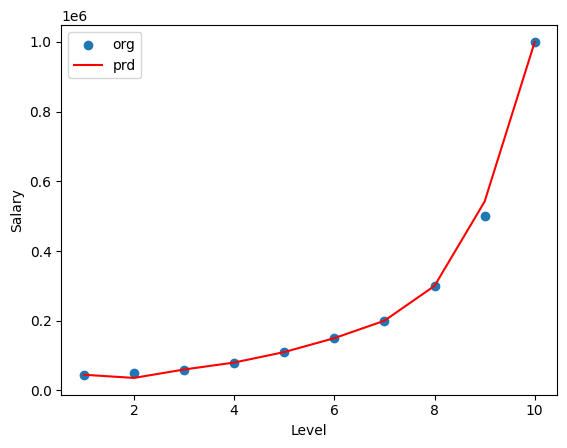

In [132]:
plt.scatter(dataset["Level"], dataset["Salary"])
plt.plot(dataset["Level"], prd, c = "red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["org", "prd"])
plt.show()

Increasing the polynomial degree increases model flexibility. With a small dataset, a high-degree polynomial can closely fit the data points, resulting in a high R² score, but it may lead to overfitting

## Model Selection: Best Fit vs Overfitting

In regression, our objective is to achieve a **best-fit model**, not an **overfitted** or **underfitted** one.

In this dataset, we have **only 10 data points**. When a **high-degree polynomial (degree = 7)** is used, the regression curve passes through (or very close to) all data points. Although this results in a very high accuracy and R² score, it leads to **overfitting**.

Overfitting means:
- The model learns the **noise** in the data
- It performs very well on training data
- But it fails to generalize to **new, unseen data**

In this case, degree = 7 was used **only to demonstrate** how a polynomial curve can cover all points when data is very limited. However, this is **not the recommended approach**.

For real-world problems:
- When the dataset is **small**, using a very high degree should be avoided
- The polynomial degree should be chosen such that the model captures the **trend**, not every single point
- A **lower-degree polynomial** that balances bias and variance gives a **best-fit model**

Therefore, even though a higher degree can perfectly fit limited data, **best practice is to choose the degree that avoids both underfitting and overfitting**, ensuring better generalization.


## Prediction on New / Unseen Data (Deployment Perspective)

After training the polynomial regression model, it can be used to make predictions on **new or unseen data**, which is required during **deployment**.

When a random input value is received (for example, `Level = 9`), the input must be transformed using the **same PolynomialFeatures object** that was used during training. This ensures consistency in feature scaling and polynomial expansion.

Example:

- Step 1: Transform the new input using PolynomialFeatures  
- Step 2: Predict the output using the trained Linear Regression model

```python
test = pf.transform([[9]])
lr.predict(test)


In [140]:
test = pf.transform([[9]])
test

C:\Users\shali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904900e+04, 5.314410e+05, 4.782969e+06]])

In [141]:
lr.predict(test)

array([541984.12750102])

Although the predicted value for Level = 9 is not exactly equal to the actual salary,
this behavior is expected in a best-fit regression model. The model prioritizes
generalization over memorization, ensuring better performance on unseen data.


Actual = 500000

Predicted ≈ 541984

Error ≈ 8%

Acceptable & realistic